# Exploratory data analysis (EDA)

## Haberman's Survival dataset

### Objective: Exploring and finding survival of patients who had undergone cancer surgery

**The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.**

**Number of Rows / Instances: 306**

**Number of Columns / Attributes / Features: 4 (including the class attribute)**

***Attribute Information:***
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
    - '1' denotes the patient survived 5 years or longer
    - '2' denotes the patient died within 5 year

***Reference:***

To explore more about Haberman's Survival Data Set, try this link https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load Haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

haberman['status'] = haberman['status'].apply(lambda x: 'Survived' if x == 1 else 'Died')
haberman.head()

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [14]:
# data-points and features
print(haberman.shape)

(306, 4)


In [15]:
# column names in the dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [16]:
# list the data types for each column
print(haberman.dtypes)

age        int64
year       int64
nodes      int64
status    object
dtype: object


In [17]:
# rename columns for clarity
haberman.rename(columns={'age':'patient_age', 'year':'year_of_surgery', 'nodes':'pos_axillary_nodes', 'status':'survival_status' }, inplace=True)

# column names in the dataset
print(haberman.columns)

Index(['patient_age', 'year_of_surgery', 'pos_axillary_nodes',
       'survival_status'],
      dtype='object')


In [18]:
# adding 1900 to the year_of_operation to get YYYY format
haberman[['year_of_surgery']] = 1900 + haberman[['year_of_surgery']]
haberman.head()

,patient_age,year_of_surgery,pos_axillary_nodes,survival_status
0,30,1964,1,Survived
1,30,1962,3,Survived
2,30,1965,0,Survived
3,31,1959,2,Survived
4,31,1965,4,Survived


In [19]:
haberman["survival_status"].value_counts()

Survived    225
Died         81
Name: survival_status, dtype: int64

In [20]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_age         306 non-null    int64 
 1   year_of_surgery     306 non-null    int64 
 2   pos_axillary_nodes  306 non-null    int64 
 3   survival_status     306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


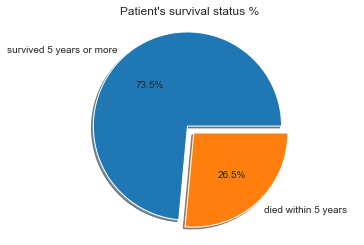

In [21]:
# reference https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

labels = 'survived 5 years or more', 'died within 5 years'
sizes = []
sizes = haberman["survival_status"].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'survived less than 5 years')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Patient\'s survival status %')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Observation 1:

1. Total number of rows/instances = **306**

2. Total number of columns/attributes/features = **4**

3. There are no missing values

4. **73.5%** patients survived more than 5 years and **26.5%** died within 5 years

5. Haberman is an imbalanced dataset as the number of data points of patients survived is almost triple compared to patient died

    * number of patients who survived 5 years or more = **225**
    
    * number of patients who died within 5 year = **81**

# Bivariate analysis - 2-D Scatter Plot

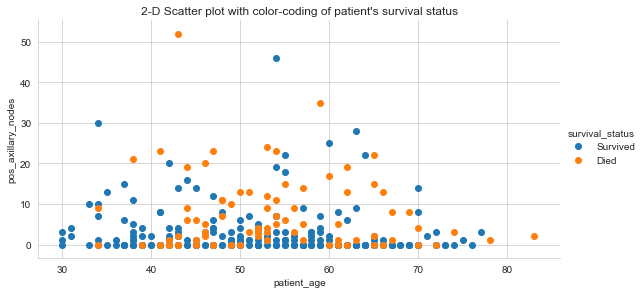

In [34]:
# 2-D Scatter plot with color-coding for each survival status.
# we will classify based on patient's survival status

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=4, aspect=2) \
   .map(plt.scatter, "patient_age","pos_axillary_nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding of patient\'s survival status')
plt.show();

### Observation 2:

1. Using 2-D Scatter plot with color-coding helps us in understanding how many patients survived after they underwent surgery based on their age and positive axillary nodes

2. Blue indicates the patients survived more that 5 years after the surgery

3. Orange indicates the patients died within 5 years after the surgery

4. The patients **age** ranges **mostly between 30 and 77**

5. The **positive axillary nodes** found in the patients **mostly ranges from 0 to 25** with few outliers

#  Multivariate analysis - Pair-plot

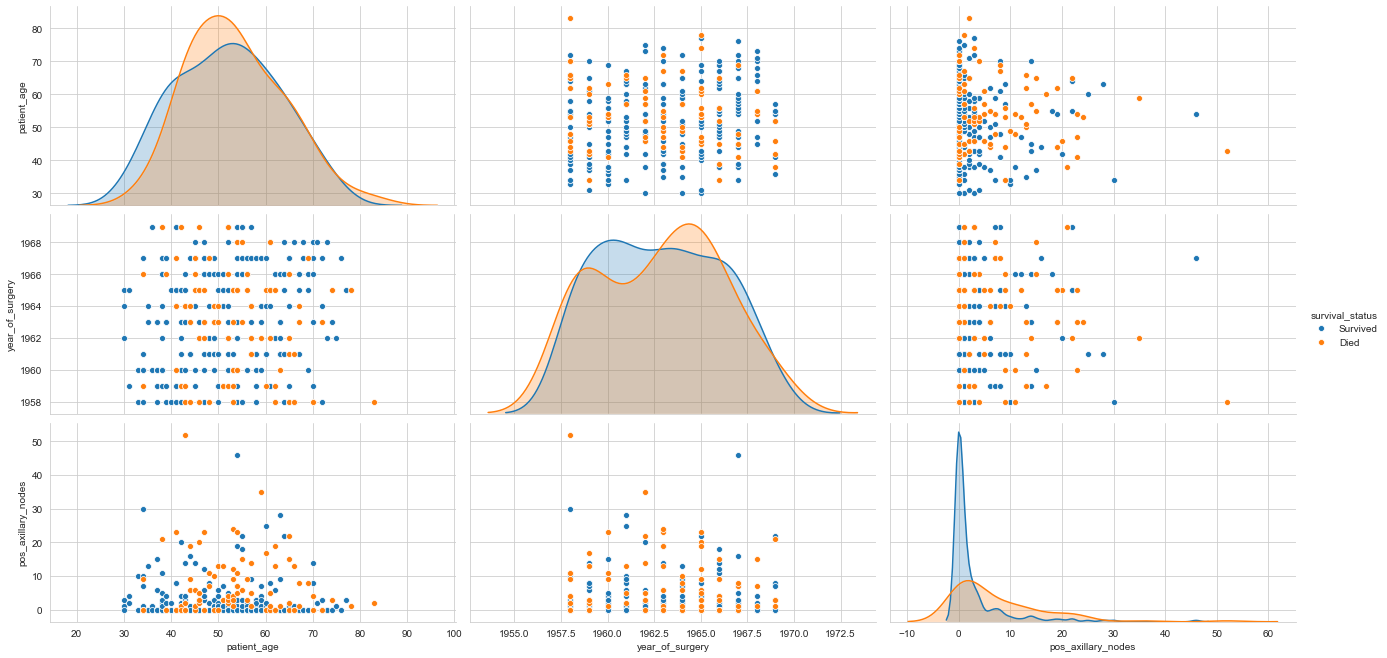

In [23]:
# pairwise scatter plot: Pair-Plot
# cannot visualize higher dimensional patterns in 3-D and 4-D
# only possible to view 2D patterns

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=3, aspect=2);
plt.show()

# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

### Observation 3:

1. **"patient age"** and **"positive axillary nodes"**, are the most useful features to identify patient's survival from cancer

2. Blue indicates the patients survived more that 5 years after the surgery

3. Orange indicates the patients died within 5 years after the surgery

4. The data is overlapping and therefore linearly not separable

# Univariate analysis - Histogram, PDF, CDF

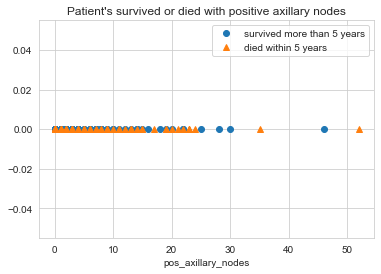

In [24]:
# 1-D Scatter plot with color-coding

import numpy as np
survived_more_than_5 = haberman.loc[haberman["survival_status"] == 'Survived'];
survived_less_than_5 = haberman.loc[haberman["survival_status"] == 'Died'];

labels = ['survived more than 5 years', 'died within 5 years']

plt.plot(survived_more_than_5["pos_axillary_nodes"], np.zeros_like(survived_more_than_5['pos_axillary_nodes']), 'o')
plt.plot(survived_less_than_5["pos_axillary_nodes"], np.zeros_like(survived_less_than_5['pos_axillary_nodes']), '^')
plt.xlabel('pos_axillary_nodes')
plt.legend(labels)
plt.title('Patient\'s survived or died with positive axillary nodes')
plt.show()

#Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.

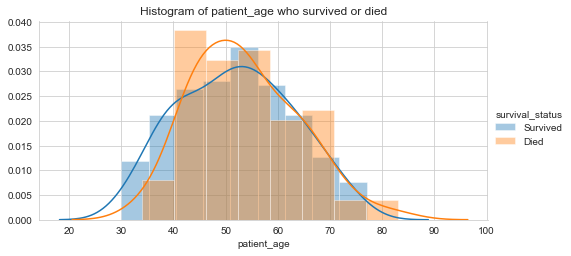

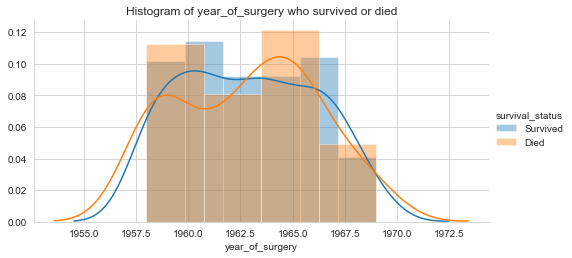

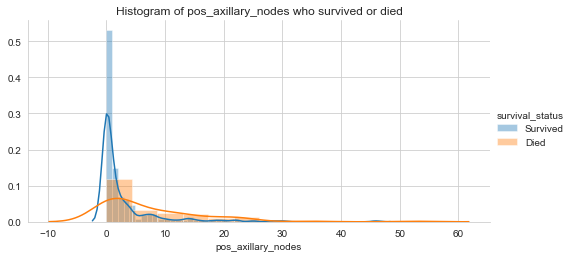

In [25]:
for feature in list(haberman.columns[:-1]):
    sns.FacetGrid(haberman, hue="survival_status", height=3.5, aspect=2) \
   .map(sns.distplot, feature).add_legend();
    
    plt.title('Histogram of {} who survived or died'.format(feature))

plt.show();

### Observation 4:

1. **Patient age:**
    * the age of patients who survived 5 years or more after surgery ranges between 30 and 77
    * the maximum survivors are between 50 and 55 years of age
    * the age of patients who died within 5 years after surgery ranges between 35 and 83
    * the maximum deaths are between 40 and 70 years of age


2. **Positive axillary nodes:**
    * the patients who survived 5 years or more after surgery had 0 to 4 positive axillary nodes
    * the maximum survivors had 0 positive axillary nodes
    * the patients who died within 5 years after surgery had 0 to 31 positive axillary nodes
    * the maximum patients who died had 0 to 9 positive axillary nodes


3. In **positive axillary nodes** there few data points of surived patient even with positive axillary nodes between 45 to 47

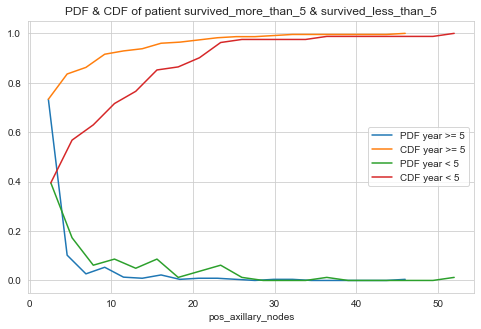

In [26]:
# We can visually see what percentage of patient survived or died with positive axillary nodes
# Plot PDF & CDF of patient survived_more_than_5 & survived_less_than_5

fig= plt.figure(figsize=(8,5))

# survived_more_than_5
counts, bin_edges = np.histogram(survived_more_than_5['pos_axillary_nodes'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year >= 5')
plt.plot(bin_edges[1:], cdf, label='CDF year >= 5')

# survived_less_than_5
counts, bin_edges = np.histogram(survived_less_than_5['pos_axillary_nodes'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year < 5')
plt.plot(bin_edges[1:], cdf, label='CDF year < 5')

plt.xlabel('pos_axillary_nodes')
plt.title('PDF & CDF of patient survived_more_than_5 & survived_less_than_5')

plt.legend()
plt.show();

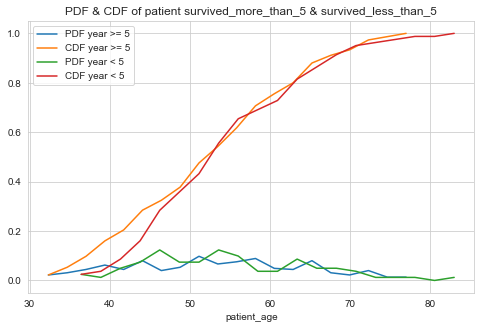

In [27]:
# We can visually see what percentage of patient survived or died based on age
# Plot PDF & CDF of patient survived_more_than_5 & survived_less_than_5

fig= plt.figure(figsize=(8,5))

# survived_more_than_5
counts, bin_edges = np.histogram(survived_more_than_5['patient_age'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year >= 5')
plt.plot(bin_edges[1:], cdf, label='CDF year >= 5')

# survived_less_than_5
counts, bin_edges = np.histogram(survived_less_than_5['patient_age'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year < 5')
plt.plot(bin_edges[1:], cdf, label='CDF year < 5')

plt.xlabel('patient_age')
plt.title('PDF & CDF of patient survived_more_than_5 & survived_less_than_5')

plt.legend()
plt.show();

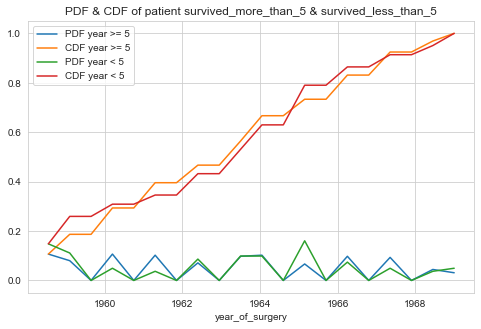

In [28]:
# We can visually see what percentage of patient survived or died based on year of surgery
# Plot PDF & CDF of patient survived_more_than_5 & survived_less_than_5

fig= plt.figure(figsize=(8,5))

# survived_more_than_5
counts, bin_edges = np.histogram(survived_more_than_5['year_of_surgery'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year >= 5')
plt.plot(bin_edges[1:], cdf, label='CDF year >= 5')

# survived_less_than_5
counts, bin_edges = np.histogram(survived_less_than_5['year_of_surgery'], bins=20, density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year < 5')
plt.plot(bin_edges[1:], cdf, label='CDF year < 5')

plt.xlabel('year_of_surgery')
plt.title('PDF & CDF of patient survived_more_than_5 & survived_less_than_5')

plt.legend()
plt.show();

### Observation 5:


1. **Positive axillary nodes:**

    * About 82% of the survived patients have less than or equal to 4 positive axillary nodes
    * About 91% of the survived patients have less than 10 positive axillary nodes
    * About 58% of the non survived patients have less than or equal to 5 positive auxillary nodes


2. **Patient's age:**
    * Age less than 35 have definitely survived
    * Age between 35 and 44 have high survival rate


3. **Year of surgery:**
    * Patients operated before 1960 have higher rate of death
    * Patients operated between 1961 to 1965 have slightly higher rate of survival
    * Patients operated between 1965 to 1967 have low rate of survival

# Univariate analysis - Mean, Median, Std-dev, Quantiles, Percentiles, IQR, MAD

In [31]:
# Mean, Variance, Std-dev, Quantiles, Percentiles, IQR, MAD of patients who survived more than 5 years after surgery

stat_more_than_5 = survived_more_than_5[['patient_age','pos_axillary_nodes']]

print("Statistics of patients who survived more than 5 years after surgery:")

print("\n90th Percentiles:")
print("Patient age: ",np.percentile(stat_more_than_5["patient_age"],90))
print("Positive axillary nodes: ",np.percentile(stat_more_than_5["pos_axillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Patient age: ",robust.mad(stat_more_than_5["patient_age"]))
print("Positive axillary nodes: ",robust.mad(stat_more_than_5["pos_axillary_nodes"]))

print ("\nMean, Std-dev, Quantiles, IQR, Min, Max, Count")
stat_more_than_5.describe()

Statistics of patients who survived more than 5 years after surgery:

90th Percentiles:
Patient age:  67.0
Positive axillary nodes:  8.0

Median Absolute Deviation
Patient age:  13.343419966550417
Positive axillary nodes:  0.0

Mean, Std-dev, Quantiles, IQR, Min, Max, Count


,patient_age,pos_axillary_nodes
count,225.000000,225.000000
mean,52.017778,2.791111
std,11.012154,5.870318
min,30.000000,0.000000
25%,43.000000,0.000000
50%,52.000000,0.000000
75%,60.000000,3.000000
max,77.000000,46.000000


In [32]:
# Mean, Variance, Std-dev, Quantiles, Percentiles, IQR, MAD of patients who died within 5 years after surgery

stat_less_than_5 = survived_less_than_5[['patient_age','pos_axillary_nodes']]

print("Statistics of patients who died within 5 years after surgery:")

print("\n90th Percentiles:")
print("Patient age: ",np.percentile(stat_less_than_5["patient_age"],90))
print("Positive axillary nodes: ",np.percentile(stat_less_than_5["pos_axillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Patient age: ",robust.mad(stat_less_than_5["patient_age"]))
print("Positive axillary nodes: ",robust.mad(stat_less_than_5["pos_axillary_nodes"]))

print ("\nMean, Std-dev, Quantiles, IQR, Min, Max, Count")
stat_less_than_5.describe()

Statistics of patients who died within 5 years after surgery:

90th Percentiles:
Patient age:  67.0
Positive axillary nodes:  20.0

Median Absolute Deviation
Patient age:  11.860817748044816
Positive axillary nodes:  5.930408874022408

Mean, Std-dev, Quantiles, IQR, Min, Max, Count


,patient_age,pos_axillary_nodes
count,81.000000,81.000000
mean,53.679012,7.456790
std,10.167137,9.185654
min,34.000000,0.000000
25%,46.000000,1.000000
50%,53.000000,4.000000
75%,61.000000,11.000000
max,83.000000,52.000000


### Observation 6:

1. Patients who survived more than 5 years after surgery,
    * Average age is **52** and mean age is **52.02** approx. 
    * Average positive axillary nodes is **0** and mean is **2.79** (approx. with outliers)
    * **90%** of the patient who survived has maximum age of **67** and **8** positive axillary nodes
    * **75%** of the patient who survived has maximum age of **60** and **3** positive axillary nodes


2. Patients who died within 5 years after surgery,
    * Average age is **53** and mean age is **53.67** approx. 
    * Average positive axillary nodes is **4** and mean is **7.45** (approx. with outliers)
    * **90%** of the patient who died has maximum age of **67** and **20** positive axillary nodes
    * **75%** of the patient who died has maximum age of **61** and **11** positive axillary nodes

# Bivariate analysis - Box plot and Whiskers

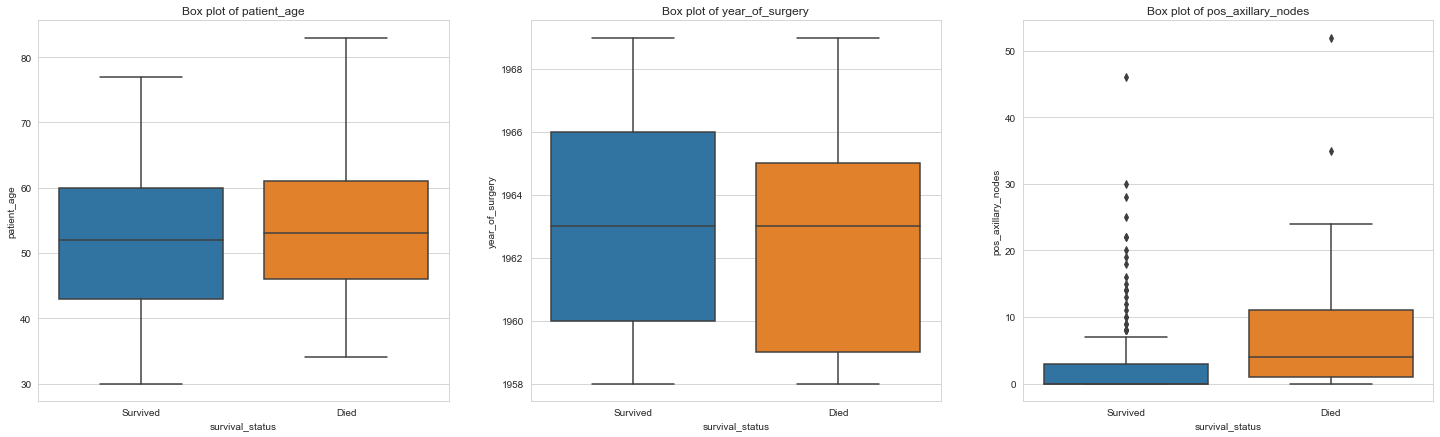

In [79]:
# NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
# Whiskers in the plot below do not correposnd to the min and max values.

# Box-plot can be visualized as a PDF on the side-ways.

fig, axis = plt.subplots(1, 3, figsize=(25,7))

for index, feature in enumerate(list(haberman.columns)[:-1]):
    box_plt = sns.boxplot(x='survival_status',y=feature, data=haberman, ax=axis[index])
    box_plt.set_title('Box plot of {}'.format(feature))
    
plt.show()


# lot of outliers in the data for pos_axillary_nodes

### Observation 7:

1. Based on Box plot and Whiskers:

    * patients with age less than **34** has definately survived
    
    * patients with age greater than **78** has definately died
    
    * higher rate of survival who were operated from **1965** onwards
    
    * lower rate of survival who were operated before **1960**
   
    * **75%** of patients who survived has positive axillary nodes between **0** and **3**
    
    * **50%** of patients who died has positive axillary nodes between **0** and **4**
    
    * positive axillary nodes feature has **lot of outliers**


# Bivariate analysis - Violin plots

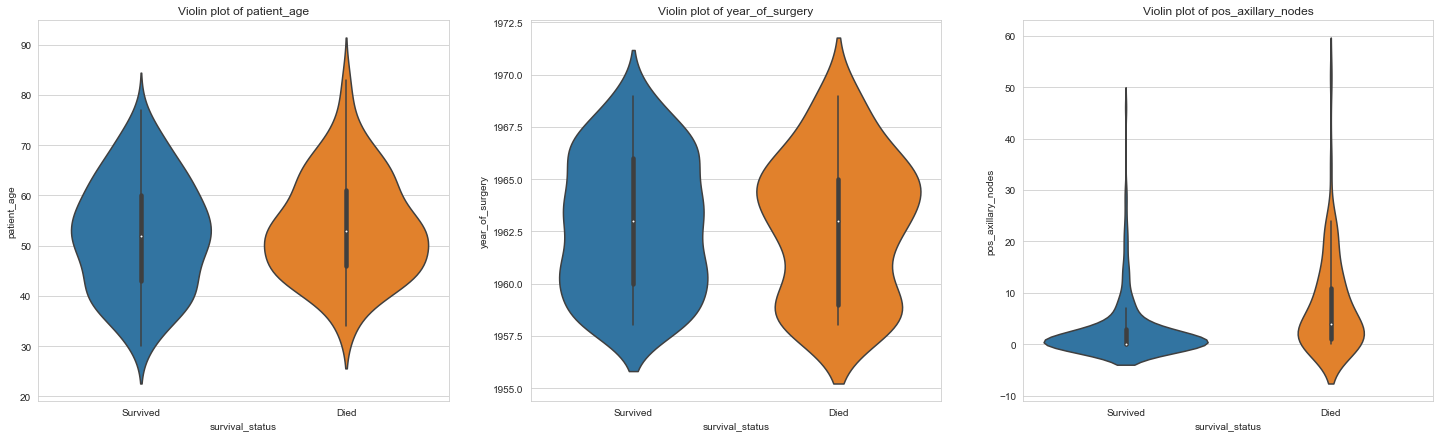

In [78]:
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

fig, axis = plt.subplots(1, 3, figsize=(25,7))

for index, feature in enumerate(list(haberman.columns)[:-1]):
    vln_plt = sns.violinplot(x='survival_status',y=feature, data=haberman, ax=axis[index])
    vln_plt.set_title('Violin plot of {}'.format(feature))
    
plt.show()


### Observation 8:

1. Looking at the Violin plot:

    * Patient age data is almost normally distributed with a little fluctuation,
        * between **40** and **50** for survived patient
        * around **60** for patient who died

    * Year of surgery data distribution is not normally distributed,
        * almost flat in nature between **1959 - 1966** for survived patient
        * peaks at two places between **1956 - 1960** and **1963 - 1966** for patient who died

    * Positive axillary nodes data is not normally distributed,
        * very steep and right skewed around **0** with a long tail due to **outliers** for survived patient
        * right skewed around **0** and **4** with a long tail due to **outliers** for patient who died
    

# Conclusion:

1. Haberman is an imbalanced dataset as the number of data points of patients survived is almost triple compared to patient died

    * number of patients who survived 5 years or more = **225**
    
    * number of patients who died within 5 year = **81**


2. **73.5%** patients survived more than 5 years and **26.5%** died within 5 years


3. **"patient age"** and **"positive axillary nodes"**, are the most useful features to identify patient's survival from cancer. The data is overlapping and therefore linearly not separable


4. Patients who survived more than 5 years after surgery,

    * Average age is **52** and mean age is **52.07** approx.
    * Age less than **34** has definately survived
    * **75%** of the patient who survived has maximum age of **60** and **0 to 3** positive axillary nodes
    * Higher rate of survival who were operated from **1965** onwards
    * Data for **"patient_age"** is **almost normal**, but for **"year_of_surgery"** & **"pos_axillary_nodes"** is **not normal**


5. Patients who died within 5 years after surgery,

    * Average age is **53** and mean age is **53.67** approx.
    * Age greater than **78** has definately died
    * **75%** of the patient who died has maximum age of **61** and **0 to 11** positive axillary nodes
    * Lower rate of survival who were operated before **1960**
    * Data for **"patient_age"** is **almost normal**, but for **"year_of_surgery"** & **"pos_axillary_nodes"** is **not normal**